# Final Assignment RO47002 - Machine Learning for Robotics 2021/2022

Before you start, fill in the cell below your lab group's number and the names of both lab partners.
It is also suggested that you carefully read through all provided content before you start adding things.

*Note*: as always, basic plagiarism and ethical guidelines apply:
* By submitting this notebook, **you both claim that the solution is yours and yours only.**
* You are not allowed to share your work with others.
* Even after the deadline has passed, do *not* share or upload your solution anywhere (e.g. do not put it on github).

In [1]:
GROUP_NUMBER = "6"
STUDENT_NAME1 = "Weihao Xuan"
STUDENT_NUMBER1 = "5360862"
STUDENT_NAME2 = "Siyuan Wu"
STUDENT_NUMBER2 = "5488362"

In [2]:
# Note: this block is a check that you have filled in the above information.
# It will throw an AssertionError until all fields are filled
assert(GROUP_NUMBER != "")
assert(STUDENT_NAME1 != "")
assert(STUDENT_NUMBER1 != "")
assert(STUDENT_NAME2 != "")
assert(STUDENT_NUMBER2 != "")

---

## Introduction
We are in the year 2121. The newest sport sensation is solar robot racing. Similar to Formula 1, the races are held on different tracks, however times have changed and those are no longer in different countries but on different planets. The Earth track is well-known for its lush green surroundings, the Mars track for its bright red environment, the Saturn track is instantly recognizable for the brownish soil, and a new race track is currently being built on Neptune, promising a soothing blue background.

Like in good old fashioned car racing, no modifications of the car are allowed between races, and in particular the AI cannot be changed. That means we need to develop one single machine learning model that is able to drive on all planets. From past competitions we have data from Earth, Mars, and Saturn (i.e., the 3 datasets provided) but we do not have any data from Neptune yet (i.e., this is a hidden test set), making this season extra challenging. However, we have the possibility to collect more data on 3 planets and can also use test tracks on planets not participating in the competition (i.e., the provided code that allows to collect more data and to change some properties of the environment).

As you are just starting out as a solar robot racing AI engineer, you first get the familiarization assignment to train a model solely for Earth before moving on to designing a competition-grade AI.

## Robot car AI

In this competition, the robot car's actions need to be determined based on only the robot car's last observation (i.e. sensor measurements). More technically: the goal is to create a function $f(observation) \rightarrow action$, which the robot can continuously apply in a loop on its sensor measurements to determine its next action. This type of function is often called a *policy*.

In this assignment, the input and output of the policy function $f$ are defined as:
- the input `observation` will be an RGB image (a numpy array) containing a top-down view of the robot's surroundings, including the road ahead.
- the output `action` should be an integer out of one of the possible actions (an integer between 0 and 4):
    0. Do nothing
    1. Accelerate
    2. Turn steer left
    3. Turn steer right
    4. Brake

More details will be provided later in the section "0. Code to get you started" below.

Note that the policy function will completely determine the behavior of the robot.
You can think of the robot executing the policy in a never-ending loop (in pseudo-code):
```python
# Pseudo robot main loop with policy f
while True:
    observation = read_sensor_measurement()
    action = f(observation) # apply the policy
    execute_action(action)
```
In fact, the behavior is already implemented for you in a **simulator**. This means you can test a policy function $f$ by plugging it in the simulator and seeing how your robot car behaves!
The simulator also allows us to quantify how well your robot behaved by returning a 'reward' value for each simulation step (a higher reward is better). More details on the rewards will be explained below in Section 0.

## Task description: imitation learning

These type of tasks, where a robot's policy needs to be optimized to achieve a high expected reward for operating in some environment, is often addressed through *reinforcement learning*. However, in this assigment we will *not* use reinforcement learning techniques, but mainly treat the problem as a **supervised classification task**.
The training input (observations) and output (action labels) data will be obtained through demonstrations of humans *manually* controlling the robot car. By training your machine learning models on these demonstrations, you will create an AI which "imitates" how a human would drive. This type of supervised machine learning is therefore called *imitation learning*.

There are some coding challenges and design choices that you have to solve to use human driving demonstrations as labeled data to create your machine learning models. As before, you will have to think about feature extraction, hyperparemeter optimization, evaluation metrics, comparing models, etc.

Once you have trained a classification model, you could define a new policy function which uses your trained model, and test this policy in the simulator. Does your most succesful model also accumulate the most reward in the simulation? Can you make an AI which succesfully drives on known and unknown planets?

## Deliverables
The deadline is **Sunday October 24th, 2021 at 23:59**. Late submission is –1 grade point per day.

* The main deliverable is this Jupyter Notebook, integrating the report (markdown cells) and the code.
* Submission is again in the form of a single ZIP file that *includes your notebook, and all files required to run the notebook and reproduce the results*. This includes all used data/demonstrations (including the ones that were provided), any loadable parameter files, any auxiliary scripts, etc.
* Name the ZIP file "**GroupNumber_final_assignment.zip**", e.g., if you are in group 456, the name would be "456_final_assignment.zip".
* Unlike previous lab assignments, there are no autograded cells or asserts, but we will grade the notebook manually. Therefore, you are free to add cells as you see fit, as long as the required sections are still present in the notebook.
* Make sure that the notebook runs correctly. That is, clear all outputs, restart the kernel and run the notebook from top to bottom. 
* The notebook needs to be able to run within 20 minutes on a high-end PC, performing all steps (also including training, the only exception is hyperparameter optimization which can be commented out).
* In contrast to the practica, please submit the notebook *including* the output (i.e., do not clear the outputs before zipping it up). 


## Grading Criteria
Below you will find an outline of the sections that the notebook needs to contain and what we expect for each part. More specific requirements are listed there as well. The indicated number of points, out of a total of 100, should give you a rough indication of how much effort to put into each part.

In general, we will not focus as much on the performance of the method you design, but rather the _level of understanding and argumentation about your design choices_. So, we are not only interested in WHAT you did, but will put a strong emphasis on your reasoning about the WHY. Try to synthesize rather than describing what you did step by step.

### Quality of the report (20 points)
- Structure & Readability
 - Logical flow
 - Connection between parts
- Academic English
 - Do not use short forms, like "isn't", "wouldn't".
 - Do not use colloquial style, like "a couple of".
 - Spell check and proofread your report.
- Level of detail
 - Strive for elegant, concise text - longer reports do not necessarily yield higher grades.
 - There is no need to re-explain theory. Assume that the target audience of the report has followed the course.
- Figures & Tables
 - Choose figures/plots/tables carefully. Only include those that add to the story of the report. Do not put the burden on the reviewer to figure out which results you basing your conclusions on, but specifically refer (parts of) the specific table/plot/figure when needed.
 - When comparing two or more signals display them in one plot. Explain the colors / line types. The scale of the plots must be carefully chosen in order to clearly convey the information intended. Label the axes in graphs properly (variables and units).
- Citations
 - If you use images, theory and methods beyond what was covered in the course, etc., always reference sources.


### Your implementations and answers (80 points)

The remainder of this notebook follows the following structure:

0. Code to get you starte (0 points, *nothing for you to do here*)
1. Explore & Inspect the Data (5 points)
2. Prepare the Data and Evaluate Features (15 points)
3. Single Planet Action Classification  (35 points)
4. Enabling Generalization (20 points)

Apart from section 0, you will have to implement and answer questions for all of the other 4 sections to earn points. *For each of these 4 sections, we have various questions or implementation tasks that your submission should address. These are listed in the cells at the end of this notebook.*

Note that there is not one best answer to these questions, and the task could be addressed in different ways. We want to know *your* motivation for *your* selected approach.

---

# 0. Code to get you started

Note, you will not have to implement anything in this section, but you are free to play around with what is provided here, or copy parts to new cells in your solutions.

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import cv2 # you are allowed to use functions from cv2
import glob

# import the simualtion environment
import car_racing_ro47002 as cr

First, we explore the available planets. The code below generates an image from the 3 planets. You do not need to understand how this code works, but it should help you understand the context of what we are doing.
Note that the images also include your robot car, and the road ahead.

In [4]:
import ipywidgets
from IPython.display import display

# Show screenshot of a sampled environment
def plot_planet_example(planet_id):
    planet = cr.PLANETS[planet_id]
    env = cr.CarRacing(planet)
    env.seed(10)
    env.reset()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title(f'Planet {planet_id}')
    env.close()

ipywidgets.interactive(plot_planet_example, planet_id=(0,2))

interactive(children=(IntSlider(value=1, description='planet_id', max=2), Output()), _dom_classes=('widget-int…

## Loading pre-recorded human demonstrations

You are provided several pre-recorded demonstrations of a human *manually controlling* the robot car on several tracks on several planets.
**You can use this data to train a classifier that you can use to implement one or more better policies, which should (ideally) perform similar to how a human would control the robot car.**

Each provided demonstration ...
* ... contains a sequence of 1000 (observation, action) pairs ...
* ... recorded at a specic planet and track, ...
* ... for convenience, also contains (1000 dimensional) arrays containing the fixed planet's and track's id of these input/output pair.

A demonstration is stored as a python pickle file.
The code below shows how to load the saved demonstrations, and to do some simple pre-processing.

In [5]:
# Look for all the demonstration pickle files in the demonstrations/ directory.
#  The originally provided demo files are called: demo-[planet_id]-[track_id]-[datetime].pickle
#  Any demo files you record yourself are called: demostud-[planet_id]-[track_id]-[datetime].pickle

# CHANGE THIS IF NEEDED: select the pickle file pattern to match ...

#DEMO_FILEPATTERN = 'demo-*-*.pickle'      # only use ORIGINALLY provided demo files
#DEMO_FILEPATTERN = 'demostud-*-*.pickle'  # only use YOUR own collected demo files
DEMO_FILEPATTERN = 'demo*-*.pickle'       # use ALL available demo files

# find the relevant filenames
filenames = glob.glob(f'demonstrations/{DEMO_FILEPATTERN}')
filenames.sort() # ensure the order is well-defined
print(f'Found {len(filenames)} demonstrations')

# in a loop, load the found pickle files
demonstrations = []
for filename in filenames:
    with open(filename, 'rb') as fd:
        demonstration = pickle.load(fd)
        
        actions = demonstration['actions']
        print(f'Loaded {actions.shape[0]} samples from {filename} ...')
        
        demonstrations.append(demonstration)

Found 14 demonstrations
Loaded 1000 samples from demonstrations\demo-0-0-20211012_155840.pickle ...
Loaded 1000 samples from demonstrations\demo-0-1-20211012_160607.pickle ...
Loaded 1000 samples from demonstrations\demo-0-2-20211012_161107.pickle ...
Loaded 1000 samples from demonstrations\demo-0-3-20211012_161203.pickle ...
Loaded 1000 samples from demonstrations\demo-0-4-20211012_161237.pickle ...
Loaded 1000 samples from demonstrations\demo-0-5-20211012_161457.pickle ...
Loaded 1000 samples from demonstrations\demo-0-6-20211012_161843.pickle ...
Loaded 1000 samples from demonstrations\demo-0-7-20211012_161923.pickle ...
Loaded 1000 samples from demonstrations\demo-0-8-20211012_162117.pickle ...
Loaded 1000 samples from demonstrations\demo-0-9-20211012_162157.pickle ...
Loaded 1000 samples from demonstrations\demo-1-10-20211012_170226.pickle ...
Loaded 1000 samples from demonstrations\demo-1-11-20211012_171117.pickle ...
Loaded 1000 samples from demonstrations\demo-2-12-20211012_171

In [6]:
# we can combine all the observations, actions, planet and track ids
observations = np.concatenate([d['observations'] for d in demonstrations])
actions = np.concatenate([d['actions'] for d in demonstrations])
planet_ids = np.concatenate([d['planets'] for d in demonstrations])
track_ids = np.concatenate([d['tracks'] for d in demonstrations])

# pre-processing: subsample and only keep every n-th sample for efficiency
# this can speed up training
ss = 10
observations = observations[::ss]
actions = actions[::ss]
planet_ids = planet_ids[::ss]
track_ids = track_ids[::ss]

## Understanding the data

We here take a closer look at format of the demonstration data. The observations (input) are RGB images. The actions (target class labels) are integers.

In [7]:
# count the total number of observations
N = observations.shape[0]

print(f'The data consists of {N} (observation, action) pairs:')
print(f'- observations : a {observations.shape} numpy int8 array, i-th entry contains RGB image of sample i')
print(f'- actions      : a {actions.shape} numpy int array, i-th entry contains action (class) label of sample i')
print(f'- planet_ids   : a {planet_ids.shape} numpy int array, i-th entry contains the planet_id of sample i')
print(f'- track_ids    : a {track_ids.shape} numpy int array, i-th entry contains the track_id of sample i')

The data consists of 1400 (observation, action) pairs:
- observations : a (1400, 96, 96, 3) numpy int8 array, i-th entry contains RGB image of sample i
- actions      : a (1400,) numpy int array, i-th entry contains action (class) label of sample i
- planet_ids   : a (1400,) numpy int array, i-th entry contains the planet_id of sample i
- track_ids    : a (1400,) numpy int array, i-th entry contains the track_id of sample i


We can inspect inspect a single sample in the recorded data:

Action of sample 0:                     1
Planet id where sample 0 was recorded:  0
Track id where sample 0 was recorded:   0


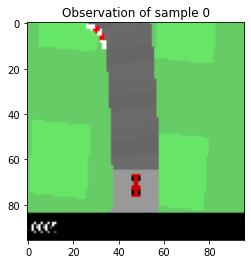

In [8]:
idx = 0 # sample index, should be in range [0, N-1]

print(f'Action of sample {idx}:                    ', actions[idx])
print(f'Planet id where sample {idx} was recorded: ', planet_ids[idx])
print(f'Track id where sample {idx} was recorded:  ', track_ids[idx])

plt.imshow(observations[idx])
plt.title(f'Observation of sample {idx}');

Note that the observation is just a low-resolution image of the simulated environment.

An action (label) is simply an integer. The five possible action values are:

In [9]:
ACTION_NOOP = 0  # NO-OPeration, i.e. do not steer, accelerate or brake
ACTION_ACCEL = 1 # Accelerate
ACTION_LEFT = 2  # Steer left
ACTION_RIGHT = 3 # Steer right
ACTION_BRAKE = 4 # Brake, deaccelerate

You can use the demonstration data to train and validate your machine learning methods.
Of course, you would first need to define some feature extraction procedure(s) to convert the observations into some suitable feature vectors for your machine learning techniques.

## Testing your model in  the simulator


At some point, *after you have trained and evaluated your classifier*, you might want to check how well your classification method can actually control the robot car. For this, you will need to wrap your trained classifier into a policy function that the simulator can use.

This section will go over the details of
* how to start the simulator;
* how to implement a policy $f$;
* how to analyse the rewards.


### Running a simulation

The function `run_simulation` below will setup a simulation of your robot on a given planet (`planet_id`) and track (`track_id`), and will use the policy `f` you provide to control the robot, for a maximum of `iterations` simulation steps. The simulation function can also show you the simulation in a popup-window (set `render=True`), or record all the (observation, actions) pairs (`record_data=True`).

The function signature of run_simulation is:
```
rewards = run_simulation(f, iterations=500, planet_id=0, track_id=0, verbose=False, render=False, record_data=False, delay=0.0)
    Run robot car simulation
    Input arguments:
    - f             # [function] the robot's policy function
    - record_data   # [True/False] if true, return all (observation, action) pairs from the simulation 
    - planet_id     # [int] select the target planet (0=Earth, 1=Mars, 2=Saturn, 3=Neptune)
    - track_id      # [int] select the target track on that planet (0, 1, 2, etc.)
    - iterations    # [int] the maximum number of iterations N to run the simulation
    - render        # [True/False] show the scene in a popup window (can be a bit slower)
    - delay         # [float] a time delay that can be added to make the simulation run a bit slower
    
    Returns:
    - rewards       # [numpy array of floats] all N rewards accumulated during the simulation
    - observations  # [numpy array N x H x W x 3] N observations, each observation being a WxH 3-channel image
    - actions       # [numpy array of ints] all N actions outputted by the given policy f
    
    Note: `observations` and `actions` are only returned if record_data=True
```


In [10]:
# user key input handler
from pyglet.window import key
import time

# keep track if which keys have been pressed in the popup window
# (will be used later for the human driver)
KEY_PRESSED = {key.LEFT: False, key.RIGHT: False, key.UP: False, key.DOWN: False}

def key_press(k, mod):
    global STOP_SIMULATION, KEY_PRESSED
    if k==key.ESCAPE: STOP_SIMULATION = True # set 'quit' flag if ESCAPE key is pressed
    KEY_PRESSED[k] = True

def key_release(k, mod):
    global KEY_PRESSED
    KEY_PRESSED[k] = False

# define the set of all actions    
ACTIONS = [0, 1, 2, 3, 4]
ACTION_NAMES = ['noop', 'accel', 'left', 'right', 'brake']
NUM_ACTIONS = 5 # number of distinct actions

# A lookup table to convert the action class to an actual control input for the simulator (steer, accel, brake)
ACTIONS_TO_CONTROL_INPUT = np.array([
    [ 0,  0,  0   ], # 0 = do nothing
    [ 0,  1,  0   ], # 1 = accelerate
    [-1,  0,  0   ], # 2 = steer left
    [ 1,  0,  0   ], # 3 = steer right
    [ 0,  0,  0.25], # 4 = brake
])

def run_simulation(f, iterations=500, planet_id=0, track_id=0, verbose=False, render=False, record_data=False, delay=0.0):
    """ Run robot car simulation
    Input arguments:
    - f             # [function] the robot's policy function
    - record_data   # [True/False] if true, return all (observation, action) pairs from the simulation
    - planet_id     # [int] select the target planet (0=Earth, 1=Mars, 2=Saturn, 3=Neptune)
    - track_id      # [int] select the target track on that planet (0, 1, 2, etc.)
    - iterations    # [int] the maximum number of iterations N to run the simulation
    - render        # [True/False] show the scene in a popup window (can be a bit slower)
    - delay         # [float] a time delay that can be added to make the simulation run a bit slower
    
    Returns:
    - rewards       # [numpy array of floats] all N rewards accumulated during the simulation
    - observations  # [numpy array N x H x W x 3] N observations, each observation being a WxH 3-channel image
    - actions       # [numpy array of ints] all N actions outputted by the given policy f
    
    Note: `observations` and `actions` are only returned if record_data=True
    """
    
    print(f'Starting simulation for {iterations} iterations.')
    print('*** Press ESC key in popup window to stop the simulation! ***')
    print()

    # create a simulation environment on the given planet
    planet = cr.PLANETS[planet_id]
    env = cr.CarRacing(planet)
    env.seed(track_id+planet_id*1455312) # set environment track generation seed based on planet_id and track_id

    rewards = [] # will store the accumulated rewards
    observations = [] # will store the accumulated observations (only if record_data==True)
    actions = [] # will store the accumulated actions outputted by policy f (only if record_data==True)
    
    # reset KEY_PRESSED state at start of simulation
    global KEY_PRESSED
    KEY_PRESSED = {key.LEFT: False, key.RIGHT: False, key.UP: False, key.DOWN: False}
    
    # the STOP_SIMULATION flag will be set to True if user wants to interrupt the simulation
    global STOP_SIMULATION
    STOP_SIMULATION = False
    completed_iterations = 0
    
    try:
        # reset the simulation, and get the initial observation (robot "sensor measurement")
        observation = env.reset()
        
        # ensure we can listen to user input in the popup window (e.g. to quit when pressing ESCAPE)
        env.viewer.window.on_key_press = key_press
        env.viewer.window.on_key_release = key_release
        
        # main simulation loop
        for itr in range(iterations):
            time.sleep(delay)
            if STOP_SIMULATION: break
                
            # ** APPLYING YOUR POLICY **
            # execute the given policy on the observation to determine the robot's action
            action = f(observation)
            
            # sanity check: is the policy implemented correctly?
            assert (isinstance(action, (int, np.integer))) # returned action should be a builtin or numpy integer
            assert (action in ACTIONS) # action should be an integer 0, 1, 2, 3 or 4

            # hard coded that for the first few iterations, the robot will always accelerate,
            #   to avoid a poor policy from not moving the robot at all
            if itr < 4: action = 1 # action 1 is accelerate
            
            if verbose:
                print(f'iteration {itr}: action = {ACTION_NAMES[action]}')

            if record_data:
                # only store all the observation and action pairs during the simulation
                #   if the record_data argument is set to True
                observations.append(observation)
                actions.append(action)
            
            # ** EXECUTE ACTION ON ROBOT & GET OBSERVATION FOR NEXT TIME STEP **
            ctrl_input = ACTIONS_TO_CONTROL_INPUT[action] 

            # execute simulation step with the given control input
            observation, reward, environment_done, info = env.step(ctrl_input)
            completed_iterations += 1
            
            if verbose:
                print(f'iteration {itr}: reward = {reward}')

            if render:
                # update pop-window visualization
                env.render()

            # collect all rewards in a list
            rewards.append(reward)
    finally:
        # make sure we always close the pop-up window,
        # even if some exception is thrown during the main loop
        env.close()
        
    rewards = np.array(rewards)
    total_reward = np.sum(rewards)
    
    print(f'total reward after {completed_iterations} iterations: {total_reward}')
    print(f'average reward: {total_reward/completed_iterations}')
    
    if record_data:
        return rewards, np.array(observations), np.array(actions, dtype=int)
        
    # by default, only return the rewards

    return rewards

### Implementing a policy

For the simulator, a policy $f(observation) \rightarrow action$ should be implemented as a plain python function which takes a numpy array as input (the observation) and returns an integer (the action).
So generally, a policy implementation would look like this:

```python

def f(observation):    
    # Input: observation, a H x W x 3 numpy array containing an RGB image of the surroundings
    # Output: action,     an integer representing the action (0 = NOOP, ... 5 = Brake)
    # N.B.: actions is just an int, NOT a numpy array
    
    # YOUR CODE
    #   convert observation to feature vector
    #   predict action class given the feature vector using some ML technique
    
    return action
```
*Of course, don't name you policy just `f`, but give it some more descriptive name!*

To illustrate, here is a dummy policy which just picks a random actions (without actually looking at the observation).

In [11]:
# a dummy policy
def f_dummy(observation):
    """ Dummy policy function, which just returns random action. """
    
    # in this dummy policy, we ignore the observation and just select a random action
    action = np.random.randint(0, NUM_ACTIONS)
    
    print(f'Received observation: {observation.shape} numpy array of type {observation.dtype}, returning action {action}')
    return action

We can confirm that the policy returns a valid action label:

In [12]:
action = f_dummy(observations[0])

# returned action should be a builtin int or a numpy integer (NOT a numpy array) in the range [0, 4]
assert (isinstance(action, (int, np.integer)))
assert (action in ACTIONS) # ACTIONS is the set of possible action labels, [0,1,2,3,4]

Received observation: (96, 96, 3) numpy array of type uint8, returning action 2


### Reward

To quantify how well a policy is working, the simulator will return the *rewards* that the robot car collected at each simulation step. The rewards determine how well you are doing in a race, and are based on the number of  segments of the track that the robot racer passes:

* Everytime a new segments of the track is touched by your robot car, your robot receives a positive reward. You can see this in the visualization when a road segments's color changes to a lighter gray.
* The robot car also get a tiny *negative* reward in each time step, as a penalty for spending time.
* When the robot car goes off the track, it will not touch any new track segments and thus only collects negative rewards, but also the friction changes which makes the robot car more difficult to control.

Overall, the goal is to cover as much of the race track as possible in the given number of simulation iterations. So, your robot car should go as fast as possible while staying on the track!

### Illustration of running the simulator with the dummy policy

Let's try to run the simulation with the dummy policy, and render the output in the popup-window for the default number of iterations.

In [13]:
# running the simulation with the dummy policy
rs = run_simulation(f_dummy, render=1, planet_id=0, track_id=0)

Starting simulation for 500 iterations.
*** Press ESC key in popup window to stop the simulation! ***

Track generation: 1383..1731 -> 348-tiles track
Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy array of type uint8, returning action 2
Received observation: (96, 96, 3) numpy array of type uint8, returning action 4
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 4
Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy array of type uint8, returning action 3
Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy array of 

Received observation: (96, 96, 3) numpy array of type uint8, returning action 3
Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy array of type uint8, returning action 3
Received observation: (96, 96, 3) numpy array of type uint8, returning action 3
Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy array of type uint8, returning action 2
Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy array of type uint8, returning action 3
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 2
Received observation: (96, 96, 3) numpy array of type uint8, returning action 4
Received observation: (96, 96, 3) numpy 

Received observation: (96, 96, 3) numpy array of type uint8, returning action 3
Received observation: (96, 96, 3) numpy array of type uint8, returning action 4
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 3
Received observation: (96, 96, 3) numpy array of type uint8, returning action 2
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 3
Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy array of type uint8, returning action 3
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy 

Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy array of type uint8, returning action 2
Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 4
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy 

Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 3
Received observation: (96, 96, 3) numpy array of type uint8, returning action 3
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 3
Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy array of type uint8, returning action 2
Received observation: (96, 96, 3) numpy array of type uint8, returning action 4
Received observation: (96, 96, 3) numpy array of type uint8, returning action 4
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 3
Received observation: (96, 96, 3) numpy 

Clearly, this policy doesn't do anything particularly useful, and should make the robot car just slowly move forward. This policy will touch only few road segments, and therefore collect little positive reward.
Let's visulize the rewards that the robot collected during the simulation.

The first plot below shows when new parts of the track are reached and a large reward is collected. The second plot shows the total/cumulative reward.

Average reward: -0.042363112391930774


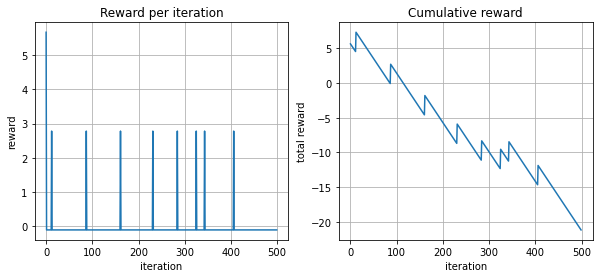

In [14]:
plt.figure(figsize=(10,4)) # create a wide figure (size 10) which is not so tall (size 4)
plt.subplot(1,2,1) # create subplot of 1 row, 2 columns, enable plotting in first cell
plt.plot(rs)
plt.xlabel('iteration')
plt.ylabel('reward')
plt.title('Reward per iteration')
plt.grid()

plt.subplot(1,2,2) # create subplot of 1 row, 2 columns, enable plotting in first cell
plt.plot(np.cumsum(rs)) # Cumulative sum of rewards
plt.xlabel('iteration')
plt.ylabel('total reward')
plt.title('Cumulative reward')
plt.grid()


print('Average reward:', np.mean(rs))

For comparing and evaluating classifiers, measure the performance of the classifiers themselves, i.e., the macro-F1 score.

Still, the simulation and rewards can help you assess in what situations your robot AI is performing well, and when it is failing.

# Collecting new demonstrations

At some point, you might want to collect more human demonstration data to make your method even beter.
You can do this by:

- manually controlling the robot car in the simulation yourself to generate new demonstrations
- recording the resulting (observation, action) pairs during these demonstrations
- saving the good demonstrations to disk to increase your example dataset

The code below demonstrates how to do this. The idea is simple: just use the regular `run_simulation()` function, but use a special `f_human()` policy which simply returns the action based on the keyboard input!

In [15]:
# a human driver
def f_human(observation):
    # Get the action obtained by the key_press/key_release callbacks from the popup window.
    # Note that the human driver (you!) will of course see the environment image in the popup window,
    # and ignore the 'observation' input of this function.
    # This 'human policy' will therefore return your 'action' response to the visual input by checking
    # which keyboard arrows you pressed.
    
    global KEY_PRESSED
    
    action = ACTION_NOOP
    if KEY_PRESSED[key.LEFT]: action = ACTION_LEFT
    elif KEY_PRESSED[key.RIGHT]: action = ACTION_RIGHT
    elif KEY_PRESSED[key.UP]: action = ACTION_ACCEL
    elif KEY_PRESSED[key.DOWN]: action = ACTION_BRAKE
    
    return action

When we use this policy, ensure that the simulator stores and return all the (observation, action) pairs by setting the `record_data` argument of run_simulation to `True`.
You can adjust the `planet_id` and `track_id` to get human driving responses on a variety of tracks in your training planet environments.

In [16]:
planet_id=0 # <-- CHANGE THIS to select the planet; can be 0, 1, 2
track_id=0  # <-- CHANGE THIS to select the track; can be any positive integer

rs, rec_obs, rec_actions = run_simulation(
    f_human,               # by using the 'human' policy, YOU determine the robot's actions based on what you see
    record_data=True,      # record and return all (observation, action) pairs from the simulation 
    planet_id=planet_id,   # select the target planet
    track_id=track_id,     # select the target track on that planet (0, 1, 2, etc.)
    iterations=1000,       # maximum number of iterations to run the simulation
    render=True,           # when controling the car manually, it makes sense to render the scene
    delay=0.01             # adding a small delay will help you control the robot car
)
# Note: with delay=0.01 the simulation runs a bit slower, which makes it easier to give demonstrations

Starting simulation for 1000 iterations.
*** Press ESC key in popup window to stop the simulation! ***

Track generation: 1383..1731 -> 348-tiles track


D:\Software\Anaconda\envs\tf2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


KeyboardInterrupt: 

Explore the just collected samples in your latest recoding using an interactive slider

In [ ]:
def plot_sample(idx, observations, actions):
    observation = observations[idx]
    action = actions[idx]
    plt.clf()
    plt.imshow(observation)
    plt.title(f'{idx}: {action}');
    
ipywidgets.interactive(lambda idx: plot_sample(idx, rec_obs, rec_actions), idx=(0,rec_obs.shape[0]-1))

If you are unhappy with the the demonstration you gave, you can just execute the `run_simulation()` cell above again, until you are satisfied.

To save the demonstration to disk, execute the cell below after setting `SAVE_DEMO` to True.

**After you have saved the demonstration, don't forget to aftewards IMMEDIATELY set `SAVE_DEMO` back to False to avoid accidentally saving new demonstrations every time you rerun the notebook!!!**

Note that the pickle filenames of your recordings will start with `demostud-`, while the originally provided demonstrations start with `demo-`. This makes it easy to load only the original, your, or both types of recordings.

In [ ]:
SAVE_DEMO = False # <-- CHANGE THIS to 'True' to SAVE the last recording to disk!

if SAVE_DEMO: 
    rec_N = rec_obs.shape[0]

    demonstration = {
        'observations': rec_obs,
        'actions': rec_actions,
        'planets': planet_id * np.ones(rec_N, dtype=int),
        'tracks': track_id * np.ones(rec_N, dtype=int),
    }
    
    # include date+time to filename in YYYYMMDD_HHMMSS format
    import datetime
    now = datetime.datetime.now()
    dt_str = now.strftime('%Y%m%d_%H%M%S')

    # Save to disk
    save_filename = f'demonstrations/demostud-{planet_id}-{track_id}-{dt_str}.pickle'
    print(f'Saving demonstation of planet {planet_id}, track {track_id} to {save_filename} ...')
    with open(save_filename, 'wb') as fd:
        pickle.dump(demonstration, fd)

Ok, that completes the example code.
Now it is your turn! Implement your solution to the final assignment below. For full points, make sure you address *all* the numbered items for each section, either by implementing something in code cells, or by providing text in Markdown cells. You are free to add as many code and markdown cells as required. Be sure to first read through all sections before you start, so you know what should go where. We are *not* using nbgrader for this final assignment.

**When you are done, double check the "Deliverables" section at the start of this notebook on how to prepare your final submission!**

Good luck!


---

# 1. Explore & Inspect the Data (5 points)
Add code and markdown cells to address all of the following points:

1. Create a visualization that shows three samples from each planet for which you have demonstrations
2. Explain in words what you observe: how do the observations from the planets vary?
3. Are the samples i.i.d.? What does that imply for splitting your data?
4. Is there a class imbalance? If yes, what are procedures to deal with that?
5. Do we have a high risk of conflicting labels for observations? What problems can this cause?
6. The data was collected from human demonstrations. What are potential issues with this way of collecting data?

 

In [17]:
# Add code and markdown cells

## 1.1
Vistualization is shown as follows.

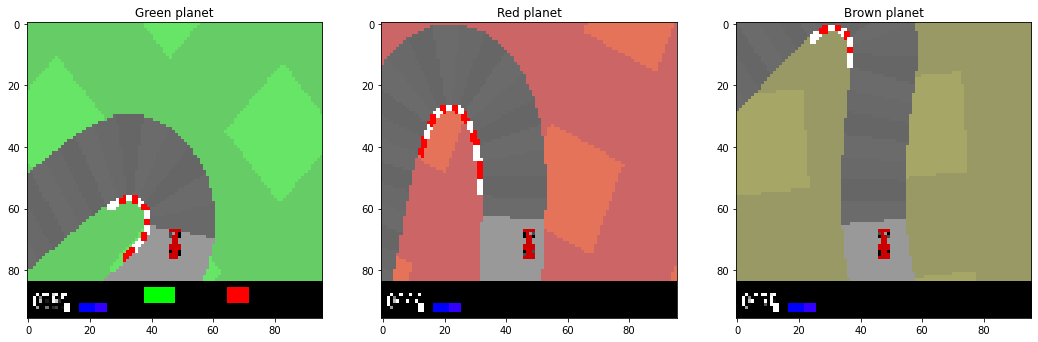

In [18]:
def vis_samples(idx, actions, observations, planet_ids):
    fig = plt.figure(figsize=(18, 6))
    fig.add_subplot(1,3,1)
    plt.imshow(observations[planet_ids==0][idx])
    plt.title('Green planet')
    
    fig.add_subplot(1,3,2)
    plt.imshow(observations[planet_ids==1][idx])
    plt.title('Red planet')
    
    fig.add_subplot(1,3,3)
    plt.imshow(observations[planet_ids==2][idx])
    plt.title('Brown planet')
    
vis_samples(150,actions,observations,planet_ids)       

## 1.2 
The variance between planets is the color of background. All samples are divided into planets with three different colors, green, blue and brown. 

## 1.3 

The samples of this dataset are not independent and identical distributed (i.i.d) . Because this dataset is sampled from several sequences of human demonstrations, which means adjecent frames in the sequence are not independent. This fact implies that we should shuffle our data before splitting.

## 1.4

There is a class imbalance. Since the number of samples in green planet is 1000, which is more than the number of samples in red (200 samples) and brown (200 samples) planets. 

Meanwhile, there are 681 samples of no action, 276 samples of accelerating, 271 samples of turning left and 172 samples of turning right. 

This class imbalance can be eliminated by using the same number of samples each class.

In [19]:
# num_noop = 0
# num_accel = 0
# num_left = 0
# num_right = 0
# num_brake = 0
# print(num_noop, num_accel, num_left, num_right, num_brake)
print("ACTION_NOOP\t", len(actions[actions == ACTION_NOOP]))
print("ACTION_ACCEL\t", len(actions[actions == ACTION_ACCEL]))
print("ACTION_LEFT\t", len(actions[actions == ACTION_LEFT]))
print("ACTION_RIGHT\t", len(actions[actions == ACTION_RIGHT]))
print("ACTION_BRAKE\t", len(actions[actions == ACTION_BRAKE]))

ACTION_NOOP	 681
ACTION_ACCEL	 276
ACTION_LEFT	 271
ACTION_RIGHT	 172
ACTION_BRAKE	 0


## 1.5 

I think we have a high risk of conflicting labels for observations. Accroding to the demonstrations, sometimes human push left or right because he want to move car from the edge of lane to the center of the lane instead of turning left or turing right.

This can cause oscillation and randomness in the data.

## 1.6

First, it may collect the noisy data because human always make mistakes. 

Second, the expense of human demonstrations is much more expensive comparing with the automatically generated data.



---

# 2. Prepare the Data and Evaluate Features (15 points)

In this section you should pre-process the data, e.g., down-sample, and extract features to create your training data matrix "X".


## 2.1. Clustering observations from planets

Before we turn towards the main task of action classification (section 2.2), let us first try a small unsupervised clustering task. Pretend that we only have the observations, but did not record the planet_ids of these observations. The goal is to cluster the observations into k=3 clusters such that 1 cluster (approximately) corresponds to 1 planet. For this task, you can ignore the actions and track_id information.

1. Propose a feature extraction method `feat_extract_clust` which can be used to CLUSTER the samples and (approximately) recover the planet_ids. Motivate what you use in your feature extraction method.
2. Perform clustering based on the features obtained with `feat_extract_clust`, and compare the results to the true planet_id labels. For this you will need to select a statistical measure to compare cluster labels to planet_ids.
3. Explain what measure you use for comparing the features and why.
4. Can you recuperate the planet_ids by clustering? Motivate your answer with your results.

In [20]:
# Add code and markdown cells

### 2.1.1

We average the 3 channel value among pixels because it can be interpreted as the average color of the image. 

In [21]:
def feat_extract_clust(obs):
  """
  obs: [N, W, H, C] or [W, H, C]
  """

  if (len(obs.shape) == 4):  # [N, W, H, C]
    return np.mean(np.mean(obs, axis=1), axis=1)
  if (len(obs.shape) == 3):  # [W, H, C]
    return np.mean(np.mean(obs, axis=1), axis=0)

feat_extract_clust(observations[1])

array([ 93.39659288, 168.03732639,  92.7546658 ])

### 2.1.2

First, we apply feature extrator above to all observations

In [22]:
# extract features
obs_cls = feat_extract_clust(observations)
obs_cls.shape

(1400, 3)

It is necessary to visualize extracted data in the 3-dimensional space to have a clear understanding of data distribution. 

In [23]:
from mpl_toolkits.mplot3d import axes3d

color_labels = np.stack([planet_ids == 0, planet_ids == 1, planet_ids == 2])
print(color_labels.shape)

def make_3d_plot_axes_equal(ax):
    """ Utility function to make axes equally scaled for 3D plots in matplotlib.
        Note that for 2D plots we can simply use ax.axes('equal'),
        but unfortunately this doesn't work for 3D plots, so we use this utility function.
        
        Inspired by: https://stackoverflow.com/a/31364297
    """ 
    
    ax_limits = np.array([ax.get_xlim3d(), ax.get_ylim3d(), ax.get_zlim3d()]).T
    
    m = ax_limits.mean(axis=0)
    max_range = (ax_limits - m).max();
    
    ax.set_xlim(m[0] - max_range, m[0] + max_range)
    ax.set_ylim(m[1] - max_range, m[1] + max_range)
    ax.set_zlim(m[2] - max_range, m[2] + max_range)
    

def plot_3d_features(X, lbs, view_angle1, view_angle2, label_name='dim'):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')

    ax.view_init(view_angle1, view_angle2)
    
    ax.scatter(X[lbs[0,:],0], X[lbs[0,:],1], X[lbs[0,:],2], s=5., alpha=0.7, c='#2ca02c')
    ax.scatter(X[lbs[1,:],0], X[lbs[1,:],1], X[lbs[1,:],2], s=5., alpha=0.7, c='#d62728')
    ax.scatter(X[lbs[2,:],0], X[lbs[2,:],1], X[lbs[2,:],2], s=5., alpha=0.7, c='#ff7f0e')

    plt.xlabel(label_name+' 0')
    plt.ylabel(label_name+' 1')
    ax.zaxis.set_label_text(label_name+' 2') # no plt.zlabel() :-/

    # ensure 3D plot has equally scaled axes
    make_3d_plot_axes_equal(ax)

    plt.show()

# make rotatable 3D plot with standard plotting tools
ipywidgets.interactive(
    lambda view_angle1, view_angle2: plot_3d_features(obs_cls, color_labels, view_angle1, view_angle2, label_name='feature'),
    view_angle1=(0, 90),
    view_angle2=(0, 360)
)

(3, 1400)


interactive(children=(IntSlider(value=45, description='view_angle1', max=90), IntSlider(value=180, description…

In the above graph, green, red and orange color indicates data are collected from Earth, Mars and Saturn

We use K-Means to classify these data because it is fast and scalable. Due to its keenly relies on selecting good initial centroids, we apply K-Means++ in our K-Meas model for better initialization, 

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

X_shuffled, y_shuffled = shuffle(obs_cls, planet_ids, random_state=0)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_shuffled)

model = KMeans(init="k-means++", n_clusters=3, random_state=8)
model.fit(X_scaled)

KMeans(n_clusters=3, random_state=8)

After training this unsupervised learning model, we can use "accuracy" and "confusion matrix" to compare cluster labels and planet_ids.

In [25]:
cls_pred = model.predict(X_scaled)
accs = accuracy_score(y_shuffled, cls_pred)
print("accuracy", accs)
conf_mat = confusion_matrix(y_shuffled, cls_pred)
print("conf matrix\n", conf_mat)
f1 = f1_score(y_shuffled, cls_pred, average='macro')
print("F1 score\n", f1)

accuracy 0.9985714285714286
conf matrix
 [[1000    0    0]
 [   0  198    2]
 [   0    0  200]]
F1 score
 0.9966665833312499


### 2.1.3

### 2.1.4

We cannot recuperate the planet_ids by clustering. Due to labels of clusters from KMeans are keenly relied on initialization, different initialization methods will create different labels.

## 2.2. Features for action classification

Now we turn to feature exration for the main classification task, which you can reuse also in the later sections of this notebook.

1. Explain: Will you use the same extractor as in step 1; Why (not)?
2. Propose a feature extraction method `feat_extract` which you will use in the subsequent sections to classify *action*, rather than planet_ids.
3. Explain: Are there any important hyperparameters in your feature extractor?
4. Explain: How will you decide on the values for these hyperparameters? What is the trade-off if this hyperparameter is either (too) low or (too) high?
5. Explain: What is the dimensionality of your feature space?
6. Apply your `feat_extract` to all observations to create the data that you will use in the subsequent sections.

In [26]:
# Add code and markdown cells

### 2.2.1

We will not use the same extractor as in previous step. This is because previous extractor averages color values among pixels and loses spatial information. It only keeps information related to the color of background of planets.

### 2.2.2

To classify actions, we need to know the curvature and the locations of boundaries of the road. The best way to obtain these information from the image is to segment and extract roads from the backgrounds. We can achieve because they have different colors.

In [27]:
# EXTRACT FEATURES

def road_extract(img, thres=10):
  img_ = img[:84, :96, :]
  array = np.resize(img, [img.shape[0]*img.shape[1], 3])

  p = np.array([1,1,1])
  q = np.array([0,0,0])
  x = p - q
  no_bg = np.linalg.norm(np.outer(np.dot(array - q, x) / np.dot(x, x), x) + q - array, axis=1) > thres
  img_ = np.resize(no_bg, [84, 96, 1])
  return img_ * 1.0

def feat_extract(obs, thres=10):
  if len(obs.shape) == 3:
    return road_extract(obs)
  if len(obs.shape) == 4:
    l = [road_extract(x) for x in obs]
    return np.stack(l)



As we already know, the color of the road on all the planets is grey-like. For these colors, the R, G, B intensities are equal to each other. These grey-like color can be represented as a straight line in 3-dimentional color space. (Grey dots in the following graph.) The vector representing this line is $[1, 1, 1]$ . Then we can compute the distance to the straight line for all pixels and decide if it belongs to road or backgrounds. 


In [28]:
img = observations[[2, 250, 450, 650, 850, 1050, 1250, 1350], :84, :, :]
msk = feat_extract(img).squeeze()
road = (img[msk == 1]).reshape(-1, 3)
background = (img[msk == 0]).reshape(-1, 3)
pixels = np.concatenate([road, background])
color_labels = np.concatenate([np.ones(len(road)), np.zeros(len(background))])
label = np.stack([color_labels == 0, color_labels == 1])

def plot_pixels_color_space(X, lbs, view_angle1, view_angle2, label_name='dim'):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')

    ax.view_init(view_angle1, view_angle2)
    
    # ax.scatter(X[:,0], X[:,1], X[:,2], s=5., alpha=0.7, c='#595e5a')

    ax.scatter(X[lbs[0,:],0], X[lbs[0,:],1], X[lbs[0,:],2], s=5., alpha=0.7, c='#595e5a')
    ax.scatter(X[lbs[1,:],0], X[lbs[1,:],1], X[lbs[1,:],2], s=5., alpha=0.7, c='#d62728')
    # ax.scatter(X[lbs[2,:],0], X[lbs[2,:],1], X[lbs[2,:],2], s=5., alpha=0.7, c='#ff7f0e')

    plt.xlabel(label_name+' 0')
    plt.ylabel(label_name+' 1')
    ax.zaxis.set_label_text(label_name+' 2') # no plt.zlabel() :-/

    # ensure 3D plot has equally scaled axes
    make_3d_plot_axes_equal(ax)

    plt.show()

# make rotatable 3D plot with standard plotting tools
ipywidgets.interactive(
    lambda view_angle1, view_angle2: plot_pixels_color_space(pixels, label, view_angle1, view_angle2, label_name='feature'),
    view_angle1=(0, 90),
    view_angle2=(0, 360)
)

interactive(children=(IntSlider(value=45, description='view_angle1', max=90), IntSlider(value=180, description…

In [29]:
del img, msk, road, background, pixels, color_labels, label


Let's visualize how this feature extractor works. It is obvious that road (white) and background (black) have successfully segmented. 

In [30]:
def display_feat_extract(i):
  plt.imshow(feat_extract(observations[i]), cmap="binary")
ipywidgets.interact(display_feat_extract, i=(0, 1399))

interactive(children=(IntSlider(value=699, description='i', max=1399), Output()), _dom_classes=('widget-intera…

<function __main__.display_feat_extract(i)>

### 2.2.3

`thres` is a threshold to classify lane and background. This is most important hyperparameter in our feature extractor.

### 2.2.4

We assume the color of roads is closed to grey, which should be distributed near the "grey-line" in color space. We use a threshold of 5 for segmentation which can provides tolerance to grey-like colors.  

If this threshold is too high, pixels belong to background will be classified as road. 

In [31]:
def display_feat_extract_thes_too_high(i):
  plt.imshow(feat_extract(observations[i], 125), cmap="binary")
ipywidgets.interact(display_feat_extract_thes_too_high, i=(0, 1399))

interactive(children=(IntSlider(value=699, description='i', max=1399), Output()), _dom_classes=('widget-intera…

<function __main__.display_feat_extract_thes_too_high(i)>

Likewise, if it's too low, pixels belong to road will be regard as background. In some cases (e.g. 229, 354, 637, 734), lanes are crumbling in the edge.

In [32]:
def display_feat_extract_thes_too_low(i):
  plt.imshow(feat_extract(observations[i], 1), cmap="binary")
ipywidgets.interact(display_feat_extract_thes_too_low, i=(0, 1399))

interactive(children=(IntSlider(value=699, description='i', max=1399), Output()), _dom_classes=('widget-intera…

<function __main__.display_feat_extract_thes_too_low(i)>

### 2.2.5

Our feature space is a binary image after cutting off boundaries. It has 8064 features.

In [33]:
img = feat_extract(observations[5])
DIMENSIONALITY = img.shape[0] * img.shape[1]
print(DIMENSIONALITY)

8064


### 2.2.6

Apply our feature extractor on all training data

In [34]:
obs_extracted = []
for i in range(observations.shape[0]):
  a = feat_extract(observations[i])
  obs_extracted.append(a)
obs_extracted = np.stack(obs_extracted)
print("New dataset after feature extraction has shape: ", obs_extracted.shape)

New dataset after feature extraction has shape:  (1400, 84, 96, 1)


----

# 3. Single Planet Action Classification  (35 points)
To get started, we will train and test a model that is only suitable for racing on a single planet, i.e., on Earth (planet 0)

As a first step split the data into a training, validation, and test set. You can use the provided data, or collect your own.

## 3.1. Shortlist Promising Models
1. Compare at least 2 models. One of them needs to be a neural network, one of them needs to be not a neural network.
2. For each of the models that you are going to compare, explain what are its relative advantages/disadvantages in terms of training time, test time, and number of model parameters compared to the other choices. Also explain how these considerations relate to the target application, and motivate which type of model would be preferred based on these considerations only (so disregarding the actual quality of the models).
3. If needed, perform dimensionality reduction before training your selection models. Expain why it is (not) needed.
4. Roughly tune those models
5. Evaluate the models in terms of performance, bias, variance, etc.
6. Please use the macro-F1 score (see sklearn documentation) as your main criterion. Looking at confusion matrices, accuracy etc. might also provide valuable insights. Why is the accuracy score potentially problematic in this setting?
7. Pick one algorithm to develop further.


In [35]:
# Add code and markdown cells

To train and test a model on earth, we need to split training set and test set for observations and actions belongs to earth.

In [36]:
# Prepare data
from sklearn.model_selection import train_test_split

obs_earth = obs_extracted[planet_ids == 0]
act_earth = actions[planet_ids == 0]
print(obs_earth.shape)
Xe_train, Xe_test, ye_train, ye_test = train_test_split(obs_earth, act_earth, test_size=0.3)

(1000, 84, 96, 1)


### 3.1.1 Compare 2 models

In the following section, we will compare 2 models as follows.

- Multi Layer Perceptrons
- RandomForest

### 3.1.2 



We choose Random Forest because it ensembles Decision Trees so that it performs good prediction results in many learning tasks.

For MLPs, it has longer training time and test time, and the number of model parameters is higher. However, this model can perform better prediction accuracy.

#### 3.1.2.1 Train Neural Network

First, we define a Neural Network as follows.

In [37]:
# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.utils import to_categorical

def NeuralNetwork(X_train, X_test, y_train, y_test):
    X_train = X_train.reshape(-1,84,96,1)
    X_test = X_test.reshape(-1,84,96,1)

    num_classes = 5
    batch_size = 256
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Dropout(0.3))
    model.add(Activation('relu'))
    model.add(Dense(5))
    model.add(Activation('softmax'))

    opt = keras.optimizers.Adam(learning_rate=1e-4)

    model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=12,
              validation_data=(X_test, y_test))
    return model

We evaluated its training time as follows, it takes 2.73s to train the MLP model.

In [38]:
%%time
nn = NeuralNetwork(Xe_train, Xe_test, ye_train, ye_test)

Epoch 1/12
3/3 [==============================] - 1s 299ms/step - loss: 1.7384 - accuracy: 0.2921 - val_loss: 1.0557 - val_accuracy: 0.5633
Epoch 2/12
3/3 [==============================] - 0s 57ms/step - loss: 1.1650 - accuracy: 0.5239 - val_loss: 0.9017 - val_accuracy: 0.6633
Epoch 3/12
3/3 [==============================] - 0s 57ms/step - loss: 1.0146 - accuracy: 0.5847 - val_loss: 0.8247 - val_accuracy: 0.6567
Epoch 4/12
3/3 [==============================] - 0s 56ms/step - loss: 0.9605 - accuracy: 0.6399 - val_loss: 0.8279 - val_accuracy: 0.6700
Epoch 5/12
3/3 [==============================] - 0s 56ms/step - loss: 0.8910 - accuracy: 0.6534 - val_loss: 0.7694 - val_accuracy: 0.6567
Epoch 6/12
3/3 [==============================] - 0s 56ms/step - loss: 0.8322 - accuracy: 0.6538 - val_loss: 0.7809 - val_accuracy: 0.6633
Epoch 7/12
3/3 [==============================] - 0s 57ms/step - loss: 0.8205 - accuracy: 0.6464 - val_loss: 0.7807 - val_accuracy: 0.6633
Epoch 8/12
3/3 [==========

We evaluate this model on the test set. MLP takes 41.2ms to predict a single observation.

In [39]:
%%time

result_nn = nn.predict_classes(Xe_test[0].reshape(1, 84, 96, 1))

Wall time: 88 ms


D:\Software\Anaconda\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


#### 3.1.2.2 Random Forest

In [40]:
# Traditional method
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def RandomForest(X_train, X_test, y_train, y_test, max_depth, n_estimators):
    # Random forest
    X_train = X_train.reshape([X_train.shape[0], -1])
    X_test = X_test.reshape([X_test.shape[0], -1])
    clf=RandomForestClassifier(max_depth = max_depth, n_estimators = n_estimators)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("Confusion matrix \n", confusion_matrix(y_test, y_pred))
    return clf

In [41]:
%%time
rf = RandomForest(Xe_train, Xe_test, ye_train, ye_test, 10, 100)


Accuracy: 0.6566666666666666
Confusion matrix 
 [[122   4   5   6]
 [ 52   8   0   2]
 [ 16   1  45   0]
 [ 16   1   0  22]]
Wall time: 529 ms


In [42]:
%%time
result_rf = rf.predict(Xe_test[0].reshape(1, 84*96))

Wall time: 8.98 ms


From previous code outputs, you may find that the training time for Random Forest is **579** ms, and test time for single input is **10.1** ms

### 3.1.2.3



How there considerations related to the target application:
- Accuracy: Higher accuracy makes the AI make less mistake, and it definite leads to higher reward.
- Training time: Shorter training time will not increase the final reward. However it will reduce time on developing this robot AI
- Test time: Longer test time will make the robot car not easy to face the sudden sharp turning in the environment, therefore it will influence the final reward.


| Methods | Accuracy | Training time | Test time | Number of model parameters
| - | - | - | - | - |
| MLP | 0.68 | 2.73s | 41.2ms | 0 |
| Random Forest | 0.6867 | 579ms | 9.92ms | 0 |

### 3.1.3 

Currently we do not need dimensionality reduction techiques. This is due to 2 obvious reasons. 
- One reason is our models are light-weight and do not consume much time to train or test. 
- The other is dimensionality reduction, for example, PCA, will destruct data's spatial constructions. After extension tests, we found applying dimensionality reduction methods will not increase accuracy

### 3.1.4

The hyperparameters in the above models are obtained from extensive tuning.

### 3.1.5




In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

ye_t_pred_nn = nn.predict_classes(Xe_train)
print("======== Neural Network ========")
print("Train size", ye_t_pred_nn.shape)
print("Train Accuracy:\t", accuracy_score(ye_train, ye_t_pred_nn))
print("Train Confusion Matrix:\n", confusion_matrix(ye_train, ye_t_pred_nn))

print("--------------------------------")
ye_pred_nn = nn.predict_classes(Xe_test)
print("Test size", ye_pred_nn.shape)
print("Test Accuracy:\t", accuracy_score(ye_test, ye_pred_nn))
print("Test Confusion Matrix:\n", confusion_matrix(ye_test, ye_pred_nn))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("======== Random Forest ========")
ye_t_pred_rf = rf.predict(Xe_train.reshape(-1, 84*96))
print("Train size", ye_t_pred_rf.shape)
print("Train Accuracy:\n\t", accuracy_score(ye_train, ye_t_pred_rf))
print("Train Confusion Matrix:\n", confusion_matrix(ye_train, ye_t_pred_rf))
print("--------------------------------")

ye_pred_rf = rf.predict(Xe_test.reshape(-1, 84*96))
print("Test size", ye_pred_rf.shape)
print("Test Accuracy:\t", accuracy_score(ye_test, ye_pred_rf))
print("Test Confusion Matrix:\n", confusion_matrix(ye_test, ye_pred_rf))

Analysis

1. For MLP, it performs 69% accuracy on training set and 71% accuracy on test set. 
2. For Random Forest, it performs 87% accuracy on training set and 68% accuracy on test set.

According to previous data, we can infer that both models have high bias. Random Forest has higher variance.

### 3.1.6

In [ ]:
from sklearn.metrics import f1_score

f1_nn = f1_score(ye_test, ye_pred_nn, average='macro')
f1_rf = f1_score(ye_test, ye_pred_rf, average='macro')
print("F1 score Neural Network:\t", f1_nn)
print("F1 score Random Forest :\t", f1_rf)

We found that Random Forest has higher marco-F1 scores. 

From the confusion matrix above we can see many observations are classified as "No Operation" in both models. In other words, recall is higher than precision. We prefer model with balanced precision and recall. Model with higher F1 score can provide balanced precision and recall. However, accuracy can not provides such information. This is the reason that accuracy score potentially problematic.

### 3.1.7

We will use *Random Forest* in following discussion.

## 3.2. Fine-Tune the System
1. What are the most important hyperparameters of your chosen algorithm?
2. Perform hyperparameter optimization (including pre-processing steps)
3. Compare at least 3 models with different sets of hyperparameters 
4. Evaluate the final model (similar to “Shortlist Promising Models” above)

### 3.2.1

The most important hyperparameters of my chosen algorithm is the `max_depth` and `n_estimators`

### 3.2.2 

In [ ]:
# pre-processing: feature extraction
from sklearn.model_selection import train_test_split

def road_extract(img, thres=10):
  img_ = img[:84, :96, :]
  array = np.resize(img, [img.shape[0]*img.shape[1], 3])

  p = np.array([1,1,1])
  q = np.array([0,0,0])
  x = p - q
  no_bg = np.linalg.norm(np.outer(np.dot(array - q, x) / np.dot(x, x), x) + q - array, axis=1) > thres
  img_ = np.resize(no_bg, [84, 96, 1])
  return img_ * 1.0

def feat_extract(obs, thres=10):
  if len(obs.shape) == 3:
    return road_extract(obs)
  if len(obs.shape) == 4:
    l = [road_extract(x) for x in obs]
    return np.stack(l)

new_obs = []
for i in range(observations.shape[0]):
  new_obs.append(feat_extract(observations[i]))
new_obs = np.stack(new_obs)

new_obs = new_obs.reshape(1400,-1)
X_train, X_test, y_train, y_test = train_test_split(new_obs[0:1000], actions[0:1000], test_size=0.3)

We perform Grid Search method for hyperparameter optimization. Note: It took half an hour to run the following block.

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics
# from sklearn.model_selection import GridSearchCV

# clf_rf=RandomForestClassifier()

# parameters = {'max_depth':[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
#               'n_estimators':[1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150, 160, 170, 180, 190, 200]}

# clf = GridSearchCV(clf_rf, parameters)
# clf.fit(X_train, y_train)
# y_pred=clf.predict(X_test)
# acc = metrics.accuracy_score(y_test, y_pred)
# print("Accuracy:", acc)

The best parameter set after extensive search is
- `max_depth` = 10
- `n_estimator` = 100

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf_rf_param1=RandomForestClassifier(max_depth = 10, n_estimators = 100)
clf_rf_param2=RandomForestClassifier(max_depth = 50, n_estimators = 250)
clf_rf_param3=RandomForestClassifier(max_depth = 20, n_estimators = 400)

clf_rf_param1.fit(X_train,y_train)
clf_rf_param2.fit(X_train,y_train)
clf_rf_param3.fit(X_train,y_train)

y_pred_param1=clf_rf_param1.predict(X_test)
y_pred_param2=clf_rf_param2.predict(X_test)
y_pred_param3=clf_rf_param3.predict(X_test)
#y_pred_param_best = clf.predict(X_test)

acc_param1 = metrics.accuracy_score(y_test, y_pred_param1)
acc_param2 = metrics.accuracy_score(y_test, y_pred_param2)
acc_param3 = metrics.accuracy_score(y_test, y_pred_param3)
f1_score_p1 = metrics.f1_score(y_test, y_pred_param1, average='macro')
f1_score_p2 = metrics.f1_score(y_test, y_pred_param2, average='macro')
f1_score_p3 = metrics.f1_score(y_test, y_pred_param3, average='macro')
confmat_p1 = metrics.confusion_matrix(y_test, y_pred_param1)
confmat_p2 = metrics.confusion_matrix(y_test, y_pred_param2)
confmat_p3 = metrics.confusion_matrix(y_test, y_pred_param3)

print("==== parameter set 1 ====\n")
print("Accuracy:\t", acc_param1)
print("F1 score:\t", f1_score_p1)
print("Confusion Matrix:\n", confmat_p1)
print("==== parameter set 2 ====\n")
print("Accuracy:\t", acc_param2)
print("F1 score:\t", f1_score_p2)
print("Confusion Matrix:\n", confmat_p2)
print("==== parameter set 3 ====\n")
print("Accuracy:\t", acc_param3)
print("F1 score:\t", f1_score_p3)
print("Confusion Matrix:\n", confmat_p3)

From above results we can obtain that the optimal parameter set after grid search achieves higher accuracy and better F1 score. 

### 3.2.4  Evaluation

The final model is model with the optimal parameter set.

In [ ]:
ye_t_pred_rf = rf.predict(Xe_train.reshape(-1, 84*96))
print("Train size", ye_t_pred_rf.shape)
print("Train Accuracy:\n\t", accuracy_score(ye_train, ye_t_pred_rf))
print("Train Confusion Matrix:\n", confusion_matrix(ye_train, ye_t_pred_rf))
print("--------------------------------")

ye_pred_rf = rf.predict(Xe_test.reshape(-1, 84*96))
print("Test size", ye_pred_rf.shape)
print("Test Accuracy:\t", accuracy_score(ye_test, ye_pred_rf))
print("Test Confusion Matrix:\n", confusion_matrix(ye_test, ye_pred_rf))

In [ ]:
# Add code and markdown cells

---

# 4. Enabling Generalization (20 points)
Now we are going to train and test a single model that is suitable for racing on all planets, i.e., a model that can generalize between planets and even to unseen planets, and that is robust to different colors of the background terrain. The idea is to take the final model you developed above as a starting point and to further develop it further for generalization.

The simulator provides you access to Neptune. However, this is to be treated as the test set, i.e., you are only allowed to test your model on it as the very final step. I.e., do not tweak your model after running that environment, you would be overfitting to the test data. Performance on the Neptune environment will NOT influence your grade.

1. How can the 3 provided datasets be used to train a model that can generalize, and even more importantly how can they be used to evaluate whether a model can generalize? (Hint: Lecture 2)
2. Above you designed features for action classification, evaluate whether that feature is indeed suitable for generalization. If necessary adapt the feature extraction.
3. Compare how well models trained just on the data from Earth and models trained on data of multiple planets generalize to unseen planets (using the approach from the first bullet, do *not* use Neptune for this comparison). Make sure that this is a fair comparison, e.g., in terms of the amount and quality of the data.
4. Discuss at least 2 methods that can be employed to make your model perform better and be robust to the variations we have in this scenario (methods for any step are fine: data collection, data augmentation, pre-processing, model structure, training, etc.)
5. Implement at least one of those methods.
6. Evaluate the final model (similar to “Shortlist Promising Models” above) for generalization making use only of data from Earth, Mars, and Saturn.
7. Test the final model on the Neptune environment and discuss its performance.
8. Save the parameters of your best multi scenario model to your hard drive (use pickle for sklearn or built-in save/load for keras), you will need to be able to reload your model without training in the next step. Be sure to include the saved parameters in your zip file so we can evaluate your best model too, even without rerunning the notebook up to here.

## 4.1

First, this task is a classification task to classify observations to different actions. To train a model that can generalize, a robust feature extraction method that can resist color differences but emphasize road's curvature and boundaries is required. Good feature extraction method makes distributions of different actions easy to separate.

To make evaluate the generalization ability of the model, we can apply k-fold Cross-validation.

## 4.2

This feature is suitable for generalization because the color information is discarded and curvature and boundaries are kept. We use following code to prove that. As you can see, observations from 3 planets after feature extraction are binary images. Therefore, these features can be used for generalization.  

In [ ]:
def vis_extracted_features(idx, observations, planet_ids):
    fig = plt.figure(figsize=(18, 6))
    fig.add_subplot(1,3,1)
    plt.imshow(observations[planet_ids==0][idx], cmap='binary')
    plt.title('Green planet')
    
    fig.add_subplot(1,3,2)
    plt.imshow(observations[planet_ids==1][idx], cmap='binary')
    plt.title('Red planet')
    
    fig.add_subplot(1,3,3)
    plt.imshow(observations[planet_ids==2][idx], cmap='binary')
    plt.title('Brown planet')
    
vis_extracted_features(150, obs_extracted, planet_ids)       

Furthermore, we could visualize the data using dimensionality reduction techniques to evaluate if feature extracted data is indeed suitable for generalization. If data is suitable for generalization, it should have the same distribution among all planets. Therefore, we can use some dimensionality reduction methods to visualize how data distributed in feature space. TSNE reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It remains the real data distribution in some extent.

In [ ]:
from sklearn.manifold import TSNE
feature_embedded = TSNE(n_components=2).fit_transform(obs_extracted.reshape(obs_extracted.shape[0], -1))

def plot_data(X, y, feat_1, feat_2, class_1=0, class_2=1, class_3=2):
    plt.plot(X[y==class_1,feat_1], X[y==class_1,feat_2], '.', label='planet '+str(class_1))
    plt.plot(X[y==class_2,feat_1], X[y==class_2,feat_2], '.', label='planet '+str(class_2))
    plt.plot(X[y==class_3,feat_1], X[y==class_3,feat_2], '.', label='planet '+str(class_2))
    plt.grid('on')
    plt.axis('equal')
    plt.xlabel('feature ' + str(feat_1))
    plt.ylabel('feature ' + str(feat_2))
    plt.legend()

plot_data(feature_embedded, planet_ids, 0, 1)

It is obvious that extracted features have the same distribution. It can resist color differences. This is indeed suitable for generalization.

## 4.3

To guarantee a fair comparison between two models, we should make sure our dataset have the same size.

In [ ]:
# Prepare 3 planet data
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate


obs_3plnt = feat_extract(observations)
act_3plnt = actions

# make this dataset have the same size with earth
X3, Y3 = resample(obs_3plnt, act_3plnt, n_samples=1000, random_state=0)
print("Samples after resample is ", Y3.shape[0])

# split train and test set
X3_train, X3_test, y3_train, y3_test = train_test_split(X3.reshape(1000, -1), Y3, test_size=0.3, random_state=0)
Xe_train, Xe_test, ye_train, ye_test = train_test_split(obs_earth.reshape(1000, -1), act_earth, test_size=0.3, random_state=0)

print("Data shape\n", "Earth\t", X3_train.shape, "3 Planets\t", Xe_train.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Apply the best classifier
rf_best = RandomForestClassifier(max_depth=5, n_estimators=26)

# Train new model for earth data
score_e = cross_val_score(rf_best, Xe_train, ye_train, cv=10)

# Train new model for 3 planets
score_3 = cross_val_score(rf_best, X3_train, y3_train, cv=10)

print("[Accuracy Avg. ] \n", "Earth\t", np.mean(score_e), "\t\t3 Planets\t", np.mean(score_3))
print("[Accuracy Std. ] \n", "Earth\t", np.std(score_e), "\t\t3 Planets\t", np.std(score_3))

Compare macro F1 scores

In [ ]:
# Train new model for earth data
score_e = cross_val_score(rf_best, Xe_train, ye_train, cv=10, scoring='f1_macro')

# Train new model for 3 planets
score_3 = cross_val_score(rf_best, X3_train, y3_train, cv=10, scoring='f1_macro')

print("[Macro-F1 Avg. ] \n", "Earth\t", np.mean(score_e), "\t\t3 Planets\t", np.mean(score_3))
print("[Macro-F1 Std. ] \n", "Earth\t", np.std(score_e), "\t\t3 Planets\t", np.std(score_3))

## 4.4

- Data collection:
  1. Due to provided data is noisy and disturbance, and actions are imbalanced, we can collect better data to aid training.
  2. If we have enough data, we can discard noisy and disturbance data.
- Pre-processing
  1. We can apply PCA for feature extraction before training model.


## 4.5


## 4.6




## 4.7

## 4.8

In [ ]:
# Add code and markdown cells

In [ ]:
# Prepare data

# X0 = X[actions == 0][:200]
# X1 = X[actions == 1][:200]
# X2 = X[actions == 2][:200]
# X3 = X[actions == 3][:200]
# X = np.concatenate([X0, X1, X2, X3])
# print(X.shape)
# Y = np.concatenate([np.zeros(X0.shape[0], np.int),
#                     1+np.zeros(X1.shape[0], np.int),
#                     2+np.zeros(X2.shape[0], np.int), 
#                     3 + np.zeros(X3.shape[0], np.int)])
# print(Y.shape)
# from sklearn.utils import shuffle
# X, Y = shuffle(X, Y)


---

# 5. Present Your Solution (5 points)
1. Summarize your main decisions and insights
2. Create a stand-alone demo. I.e., a block of cells that can be run on its own. For that you will need to load your pre-trained best model you saved in the previous section and run it on a Neptune track.


In [ ]:
# Add code and markdown cells

In [ ]:
def f_dummy(observation):
    input_ = feat_extract(observation)
    prediction = clf_rf.predict(input_.reshape(1, -1))
    action = prediction[0]
    # if action == 0:
    #     action = 1
    return action

In [ ]:
rs = run_simulation(f_dummy, render=1, planet_id=1, track_id=3)

In [ ]:
plt.figure(figsize=(10,4)) # create a wide figure (size 10) which is not so tall (size 4)
plt.subplot(1,2,1) # create subplot of 1 row, 2 columns, enable plotting in first cell
plt.plot(rs)
plt.xlabel('iteration')
plt.ylabel('reward')
plt.title('Reward per iteration')
plt.grid()

plt.subplot(1,2,2) # create subplot of 1 row, 2 columns, enable plotting in first cell
plt.plot(np.cumsum(rs)) # Cumulative sum of rewards
plt.xlabel('iteration')
plt.ylabel('total reward')
plt.title('Cumulative reward')
plt.grid()


print('Average reward:', np.mean(rs))

# PLAYGROUND


In [ ]:
def feat_extract(img, thres=10):
  img_ = img[:84, :96, :].copy()
  array = np.resize(img, [img.shape[0]*img.shape[1], 3])

  p = np.array([1,1,1])
  q = np.array([0,0,0])
  x = p - q
  no_bg = np.linalg.norm(np.outer(np.dot(array - q, x) / np.dot(x, x), x) + q - array, axis=1) < thres
  img_ = np.resize(no_bg, [84, 96, 1])
  return img_ * 1

In [ ]:
obs_extracted = []
for i in range(observations.shape[0]):
  msk = feat_extract(observations[i])
  obs_extracted.append(msk)
  # obs_extracted.append(observations[i, :84, :, :] * msk)
obs_extracted = np.stack(obs_extracted)
print("New dataset after feature extraction has shape: ", obs_extracted.shape)

In [ ]:
# Prepare data

X0 = obs_extracted[actions == 0][:200]
X1 = obs_extracted[actions == 1][:200]
X2 = obs_extracted[actions == 2][:200]
X3 = obs_extracted[actions == 3][:200]
X = np.concatenate([X0, X1, X2, X3])
print(X.shape)
Y = np.concatenate([np.zeros(X0.shape[0], np.int),
                    1+np.zeros(X1.shape[0], np.int),
                    2+np.zeros(X2.shape[0], np.int), 
                    3 + np.zeros(X3.shape[0], np.int)])
print(Y.shape)
from sklearn.utils import shuffle
X, Y = shuffle(X, Y)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier    #feature_vec = observation.flatten()
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# X_shuffled, y_shuffled = shuffle(X.reshape([1400, -1]), actions)
X_shuffled, y_shuffled = shuffle(X.reshape([X.shape[0], -1]), Y, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.3, random_state=5) # 70% training and 30% test

# clf_LDA = LinearDiscriminantAnalysis()
# clf_LDA.fit(X_train, y_train)
# X_train_LDA = clf_LDA.transform(X_train)

clf_pca = PCA(0.8)
clf_pca.fit(X_train)
X_train_pca = clf_pca.transform(X_train)
print(X_train_pca.shape)

clf_rf=RandomForestClassifier(max_depth=4, n_estimators=20, random_state=5)
clf_rf.fit(X_train_pca, y_train)

# X_test_LDA = clf_LDA.transform(X_test)
X_test_pca = clf_pca.transform(X_test)
y_pred=clf_rf.predict(X_test_pca)
print("Accuracy:\n", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
def f_dummy(observation):
    input_ = feat_extract(observation)
    # input_ = observation[:84, :, :] * input_
    # input_ = clf_LDA.transform(input_1)
    input_ = clf_pca.transform(input_.reshape(1, -1))
    prediction = clf_rf.predict(input_)
    action = prediction[0]
    if action == 0:
        if np.random.rand() > 0.5: 
            action = 1
    return action

In [ ]:
rs = run_simulation(f_dummy, render=1, planet_id=3, track_id=1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


X_train, X_test, y_train, y_test = train_test_split(X.reshape(X.shape[0], -1), Y, test_size=0.3, random_state=5) # 70% training and 30% test

num_classes = 4
batch_size = 32

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=X_train.shape[1:]))
# model.add(Conv2D(32, kernel_size=(5, 5),
#                  activation='relu',
#                  input_shape=X_train.shape[1:]))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(Conv2D(16, (3, 3), activation='relu'))
# model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
print(X_test.shape)
print(y_test.shape)

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=7,
          validation_data=(X_test, y_test))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(X_test.shape)
y_pred = model.predict_classes(X_test)
print(y_pred.shape)
print("Accuracy:\n", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
def f_dummy(observation):
    input_ = feat_extract(observation)
    # input_ = observation[:84, :, :] * input_
    input_ = input_[np.newaxis, :, :, :]
    prediction = model.predict_classes(input_.reshape([1, input_.shape[0], -1]))
    action = prediction
    return action

In [ ]:
rs = run_simulation(f_dummy, render=1, planet_id=2, track_id=0)